In [151]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [152]:
#Read input file and understand the data
# "default" is my dependent variable

In [153]:
dataframe = pd.read_csv("german_credit.csv")
dataframe.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [154]:
dataframe.dtypes

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [155]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [156]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [157]:
# Print Shape of model data
dataframe.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [158]:
for features in dataframe.columns:
    if dataframe[features].dtypes =='object':
        temp_df = pd.get_dummies(dataframe[features],prefix=features)
        dataframe=dataframe.join(temp_df)   


In [159]:
dataframe.head(2)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,1,0,0,1,0,0,0,1,0,1
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,1,0,0,1,0,0,1,0,0,1


In [160]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 75 columns):
default                                                                       1000 non-null int64
account_check_status                                                          1000 non-null object
duration_in_month                                                             1000 non-null int64
credit_history                                                                1000 non-null object
purpose                                                                       1000 non-null object
credit_amount                                                                 1000 non-null int64
savings                                                                       1000 non-null object
present_emp_since                                                             1000 non-null object
installment_as_income_perc                                                    1000 non-null int64
persona

### Check for highly correlated variables but don't required any treatment for this use case

In [ ]:
sns.pairplot(dataframe,diag_kind='kde',hue = 'default' )

In [161]:

dataframe.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-0.021822,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-0.181203,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-0.161757,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-0.057237,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,0.009065,-0.095359,0.095359,-0.054097,0.054097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
job_unskilled - resident,-0.021822,-0.181203,-0.161757,-0.057237,0.009065,0.043712,-0.010392,0.145066,0.018041,0.023542,...,0.063003,0.014347,-0.208392,-0.652438,-0.074991,1.000000,0.253720,-0.253720,0.087412,-0.087412
telephone_none,0.036466,-0.164718,-0.276995,-0.014413,-0.095359,-0.145259,-0.065553,0.014753,-0.015276,0.067149,...,0.036275,0.049524,-0.385706,0.061289,0.040124,0.253720,1.000000,-1.000000,0.107401,-0.107401
"telephone_yes, registered under the customers name",-0.036466,0.164718,0.276995,0.014413,0.095359,0.145259,0.065553,-0.014753,0.015276,-0.067149,...,-0.036275,-0.049524,0.385706,-0.061289,-0.040124,-0.253720,-1.000000,1.000000,-0.107401,0.107401
foreign_worker_no,-0.082079,-0.138196,-0.050050,-0.090024,-0.054097,-0.006151,-0.009717,0.077071,-0.059172,0.057751,...,0.018960,0.032849,-0.051858,-0.047292,0.042834,0.087412,0.107401,-0.107401,1.000000,-1.000000


In [ ]:
#credit amount and duration in month looks strongly correlated.

### Drop the original variables which are converted to dummy

In [166]:
for features in dataframe.columns:
    if dataframe[features].dtypes =='object':
        dataframe = dataframe.drop(features,axis =1)
 
dataframe.head(2)

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [167]:
array = dataframe.values
X=dataframe.drop('default',axis=1)
y=dataframe['default']

In [168]:
X.dtypes

duration_in_month                                      int64
credit_amount                                          int64
installment_as_income_perc                             int64
present_res_since                                      int64
age                                                    int64
                                                       ...  
job_unskilled - resident                               uint8
telephone_none                                         uint8
telephone_yes, registered under the customers name     uint8
foreign_worker_no                                      uint8
foreign_worker_yes                                     uint8
Length: 61, dtype: object

In [169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [170]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 500,n_jobs=2,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [171]:
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)

0.76

In [172]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, test_pred))

[[190  24]
 [ 48  38]]


### Q6 Show the list of the features importance( 1 Marks)

In [200]:
X_train = dataframe.head(700)
X_test = dataframe.tail(300)

y_train = X_train.pop("default")
y_test = X_test.pop("default")

rfcl = RandomForestClassifier(n_estimators = 500,n_jobs=2,criterion="entropy",random_state=9999)
rfcl = rfcl.fit(X_train, y_train)
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , y_test)
print(pd.DataFrame(rfcl.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                                         Imp
duration_in_month                                   0.075172
credit_amount                                       0.098818
installment_as_income_perc                          0.036468
present_res_since                                   0.034132
age                                                 0.079416
...                                                      ...
job_unskilled - resident                            0.011702
telephone_none                                      0.013998
telephone_yes, registered under the customers n...  0.013963
foreign_worker_no                                   0.003459
foreign_worker_yes                                  0.003732

[61 rows x 1 columns]


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [222]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [202]:
# Use below values
num_folds = 10
seed = 77

In [203]:
#Validate the Random Forest model build above using k fold

In [216]:

kfold = KFold(n_splits=10, random_state=seed)


In [220]:
rfc_cv_score = cross_val_score(rfcl, X, y, cv= kfold)


In [206]:
#Calculate Mean score

In [207]:
print("Mean Square Error: %.3f (%.3f)" % (-rfc_cv_score.mean(), rfc_cv_score.std()))

Mean Square Error: -0.765 (0.050)


In [208]:
# Calculate score standard deviation using std()

In [209]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.744000 (0.052574)
LDA: 0.751000 (0.055758)
KNN: 0.662000 (0.055642)
CART: 0.656000 (0.039547)
NB: 0.714000 (0.037736)
SVM: 0.687000 (0.042907)


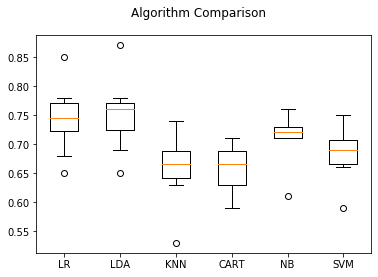

In [212]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=0)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Q8 Print the confusion matrix( 1 Marks)

In [223]:
y_kfold_pred = cross_val_predict(rfcl, X, y, cv= kfold)
print(metrics.confusion_matrix(y, y_kfold_pred))

[[649  51]
 [184 116]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
(2 Marks)

In [228]:
# make predictions
expected = y
predicted = y_kfold_pred

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85       700
           1       0.69      0.39      0.50       300

    accuracy                           0.77      1000
   macro avg       0.74      0.66      0.67      1000
weighted avg       0.75      0.77      0.74      1000



In [ ]:
#sesnitivity(Recall)= TP/(FN+TP)
sesnitivity(Recall) = 116/(184+116)

[link text](https://)### Bootstrapping ( Bonus and Optional)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
